## Подключение необходимых библиотек и данных
По мере необходиомсти, в самом начале будем подключать все библиотеки и прописывать глобальные пути и переменные.


In [1]:
# Использовал для настройки сворачиванивания кода следующие расширения
#!pip install jupyter_contrib_nbextensions
#!jupyter contrib nbextension install --user

#!pip install jupyter_nbextensions_configurator
#!jupyter nbextensions_configurator enable --user

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

TRAIN_PATH = 'train.csv'

## Загрузка данных в Data Frame

### Описание файлов
- train.csv - тренировочные данные
- test.csv - тестовые данные
- sampleSubmission.csv - образец файла для отправки в правильном формате

### Описание признаков данных
- Id - идентификационный номер квартиры
- DistrictId - идентификационный номер района
- Rooms - количество комнат
- Square - площадь
- LifeSquare - жилая площадь
- KitchenSquare - площадь кухни
- Floor - этаж
- HouseFloor - количество этажей в доме
- HouseYear - год постройки дома
- Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
- Social_1, Social_2, Social_3 - социальные показатели местности
- Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
- Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
- Price - цена квартиры


In [3]:
# Импортируем данные train.csv в pandas Dataframe
df_train = pd.read_csv(TRAIN_PATH, sep=',')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


## Основная информация

In [4]:
# Посмотрим основную информацию по все признакам
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
# Уберем идентификаторы и районы из ввещественных признаков
df_train['Id'] = df_train['Id'].astype(str)
df_train['DistrictId'] = df_train['DistrictId'].astype(str)

In [6]:
# Посмотрим основные статистики
df_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Вывод по статистикам 
Есть пропуски данных у признаков
- LifeSquare
- Healthcare_1

Имеются выбросы по значению 0, т.к. в жизни они не могут быть нулевыми, для полей
- Rooms
- HouseFloor

Имеются подозрения на выбросы по максимальному значнию
- Rooms (Среднее 1,89. Будут портиться данные)
- Square (Среднее 56,31. Будут портиться данные)
- LifeSquare (Среднее 37,19., а максимум больше полной площади. Будут портиться данные)
- KitchenSquare (Среднее 6,27,19., а максимум больше полной площади. Будут портиться данные)
- HouseYear (Очень большое значение на максимуме)

Дополнительно есть подозрения на:
- Square площадь помещения равная 1,13 не может встречаться в реальных условиях
- LifeSquare жилая площадь помещения равная 0,37 не может встречаться в реальных условиях

## Исследование вещественных признаков

Количество уникальных значений признака Rooms

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Количество уникальных значений признака Square

26.553188     1
46.363496     1
100.751999    1
70.726600     1
40.523022     1
             ..
76.481158     1
86.915187     1
82.482521     1
43.112986     1
97.664912     1
Name: Square, Length: 10000, dtype: int64

Количество уникальных значений признака LifeSquare

28.003539    1
19.224066    1
21.613298    1
25.688943    1
44.662105    1
            ..
37.980219    1
17.130385    1
33.273700    1
28.313300    1
28.421652    1
Name: LifeSquare, Length: 7887, dtype: int64

Количество уникальных значений признака KitchenSquare

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22

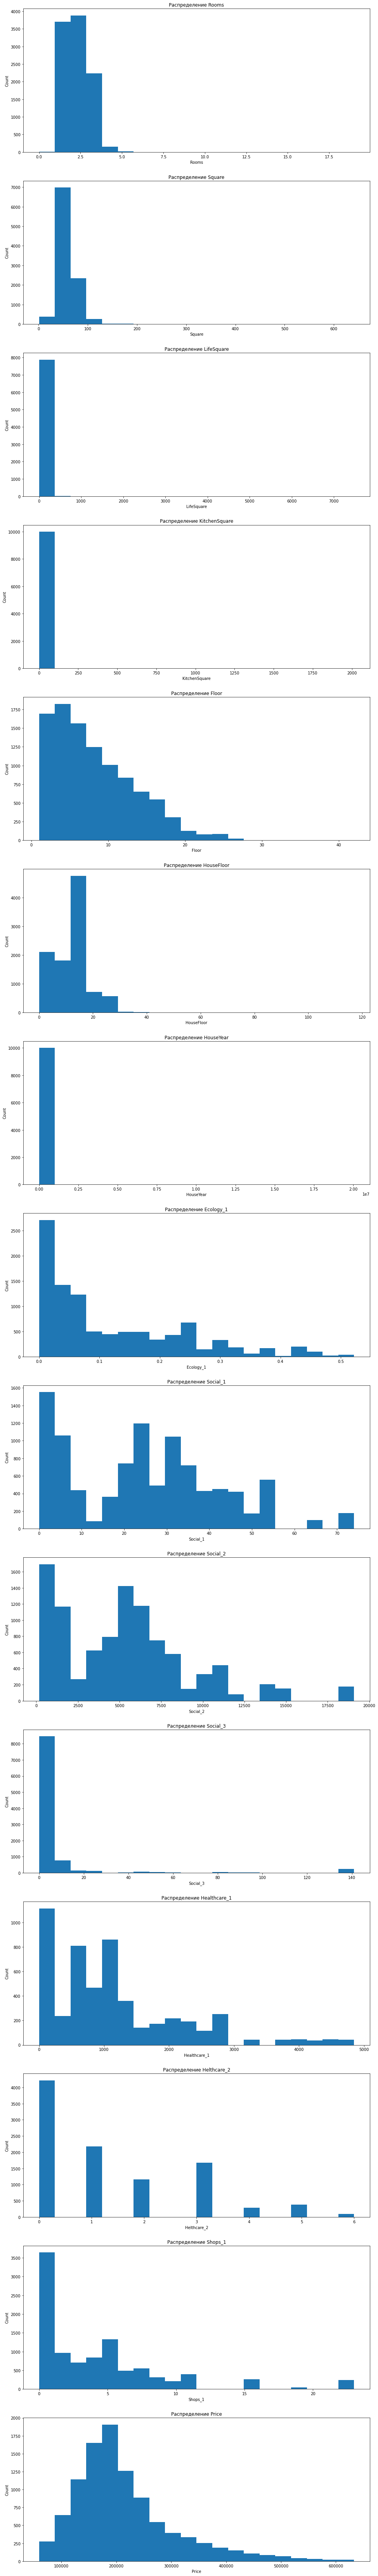

In [7]:
df_num_features = df_train.select_dtypes(include=['float64', 'int64'])
fig, axs = plt.subplots(len(df_num_features.columns), 1, figsize=(16,121))

j=0
for i in df_num_features:
    print('Количество уникальных значений признака ' + i + '\n')
    print(df_train[i].value_counts())
    axs[j].hist(df_train[i], bins=20)
    axs[j].set_title('Распределение ' + i)
    axs[j].set_xlabel(i)
    axs[j].set_ylabel('Count')
    j+=1
    print()


### Выводы по вещественным признакам

### Rooms
Есть аномалия с квартирами, где количество комнат 0. Таких квартир 8 шт. После 5 комнатных есть хвост, которые можно расценить как выброс. Для лучшего обучения можно удалить.

### Square
Аномальия по 0 значению, а так же есть длинный хвост справа, который, вероятно, относится к 19 комнатной квартире. Для лучшего обучения будем считать это выбросом.

### LifeSquare
На графике видно, что есть большой выброс, который даже больше общей площади. При обработке данных максимально изучим данный признак для очистки.

### KitchenSquare
Аналогично LifeSquare

### HouseFloor
Аномальными наблюдениями можно считать со значениями 0. Т.к. минимальное значение этажа 1. Справа видим, что есть выбросы. При очистке подробнее изучим данный показатель и устраним выбросы.

### HouseYear
Максимально аномальный показатель, т.к. имеются значения, которые на несколько порядков превышают нормальные.

### Social_1
Исходя из данных, похоже, что это количество кв.м. на 1 человека в квартире.

### Social_2
По распределению выглядит как вполне нормальных показатель.

### Social_3
Справа виден явный хвост выбросов

### Ecology_1
Экологический класс. Здесь аномалий не наблюдается. И среднее отклонение так же нормальное.

### Healthcare_1
Не совсем понятный показатель с множеством пропусков

### Helthcare_2
Вероятно, это колисество больниц поблизости. Распределение можно считать нормальным. Аномалий особых нет.

### Shops_1
Скорее всего - это количество магазинов поблизости

### Price
Целевая переменная. Вероятно в условных единицах, они же доллары США. Нет повторяющихся значений.

## Обработка вещественных признаков

### Rooms

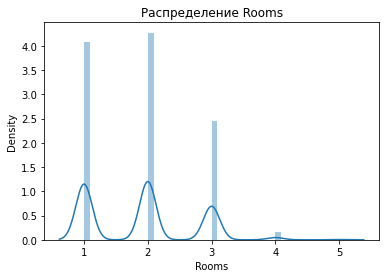

In [8]:
# Обработаем выбросы и нулевые значения комнат
df_train.loc[df_train['Rooms'] == 0, 'Rooms'] = 1
df_train.loc[df_train['Rooms'] >= 6, 'Rooms'] = df_train['Rooms'].median()

# посмотрим распределение
sns.distplot(df_train['Rooms'])
plt.title('Распределение Rooms')
plt.show()

### Square, LifeSquare, KitchenSquare

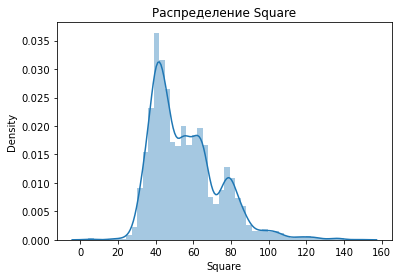

In [9]:
# рассчитаем служебные медианы
median_s = df_train['Square'].median()
median_ks = df_train['KitchenSquare'].median()
median_ls = df_train['LifeSquare'].median()

# Уберем объекты площадью меньше 4 и больше 150. Урежем хвосты и околонулевые значения
df_train.loc[df_train['Square'] > 150, 'Square'] = df_train['Square'].median()
df_train.loc[df_train['Square'] < 4, 'Square'] = df_train['Square'].median()

# посмотрим распределение
sns.distplot(df_train['Square'])
plt.title('Распределение Square')
plt.show()

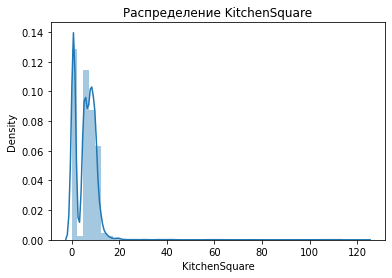

In [10]:
# Почистим значения KitchenSquare которые больше Square
# Определим коэффициент отношения площади кухни к общей площади
k_median_ks = df_train['KitchenSquare'].median() / df_train['Square'].median()

# исправим площадь кухни
df_train.loc[(df_train['KitchenSquare'] > df_train['Square']), 'KitchenSquare'] = k_median_ks * df_train['Square']

sns.distplot(df_train['KitchenSquare'])
plt.title('Распределение KitchenSquare')
plt.show()

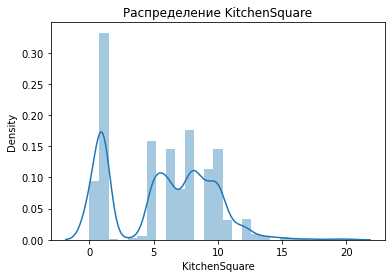

In [11]:
# Уберем хвост из площадей больше 20
df_train.loc[df_train['KitchenSquare'] > 20, 'KitchenSquare'] = df_train['KitchenSquare'].median()

sns.distplot(df_train['KitchenSquare'])
plt.title('Распределение KitchenSquare')
plt.show()

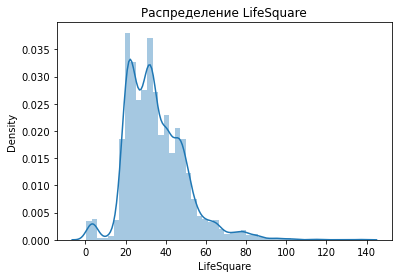

In [12]:
#Исправим пропуски LifeSquare как произведение общей площади на коэффциент жилой площади от общей
k_median_ls = df_train['LifeSquare'].median() / df_train['Square'].median()
df_train.loc[(df_train['LifeSquare'] > df_train['Square']) | 
             (df_train['LifeSquare'].isna()), 'LifeSquare'] = k_median_ls * df_train['Square']

sns.distplot(df_train['LifeSquare'])
plt.title('Распределение LifeSquare')
plt.show()

### HouseYear

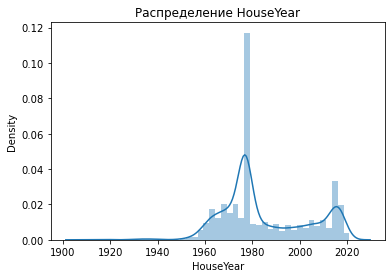

In [13]:
# изменим год постройки на текузий год, если он больше, чем текущая дата
now = datetime.datetime.now()
df_train.loc[(df_train['HouseYear'] > now.year), 'HouseYear'] = now.year

sns.distplot(df_train['HouseYear'])
plt.title('Распределение HouseYear')
plt.show()

### Floor, HouseFloor
Проверим, чтобы этаж не был больше этажности дома и оба параметра не были равны 0

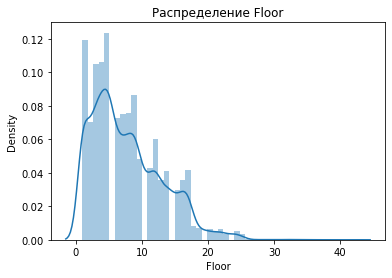

In [14]:
# обработаем нулевые этажи
df_train.loc[(df_train['Floor'] == 0), 'Floor'] = 1
df_train.loc[(df_train['HouseFloor'] == 0), 'HouseFloor'] = 1

# обработаем ситуацию когда этаж больше этажности
df_train.loc[(df_train['Floor'] > df_train['HouseFloor']), 'Floor'] = df_train['HouseFloor']

sns.distplot(df_train['Floor'])
plt.title('Распределение Floor')
plt.show()

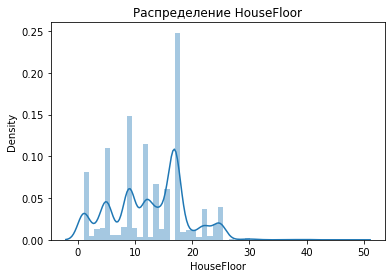

In [15]:
# df_train[(df_train['HouseFloor'] > 50)]
# Уберем хвост из наблюдений, где этажность больше 50. Их всего 3
df_train.loc[(df_train['HouseFloor'] > 50), 'HouseFloor'] = df_train['HouseFloor'].median()

sns.distplot(df_train['HouseFloor'])
plt.title('Распределение HouseFloor')
plt.show()

### Social_3

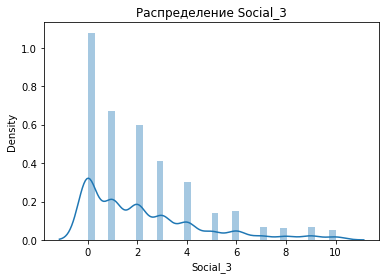

In [16]:
# Из ранее опредеденных параметров выровняем количество человек в квартире
df_train.loc[(df_train['Social_3'] > 10), 'Social_3'] = df_train['Social_3'].median()

sns.distplot(df_train['Social_3'])
plt.title('Распределение Social_3')
plt.show()

### Healthcare_1 
Удалим столбец

In [17]:
df_train.drop('Healthcare_1', axis=1, inplace=True)

### Результат обработки вещественных признаков
Посмотрим как изменились распределения после очистки

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64
















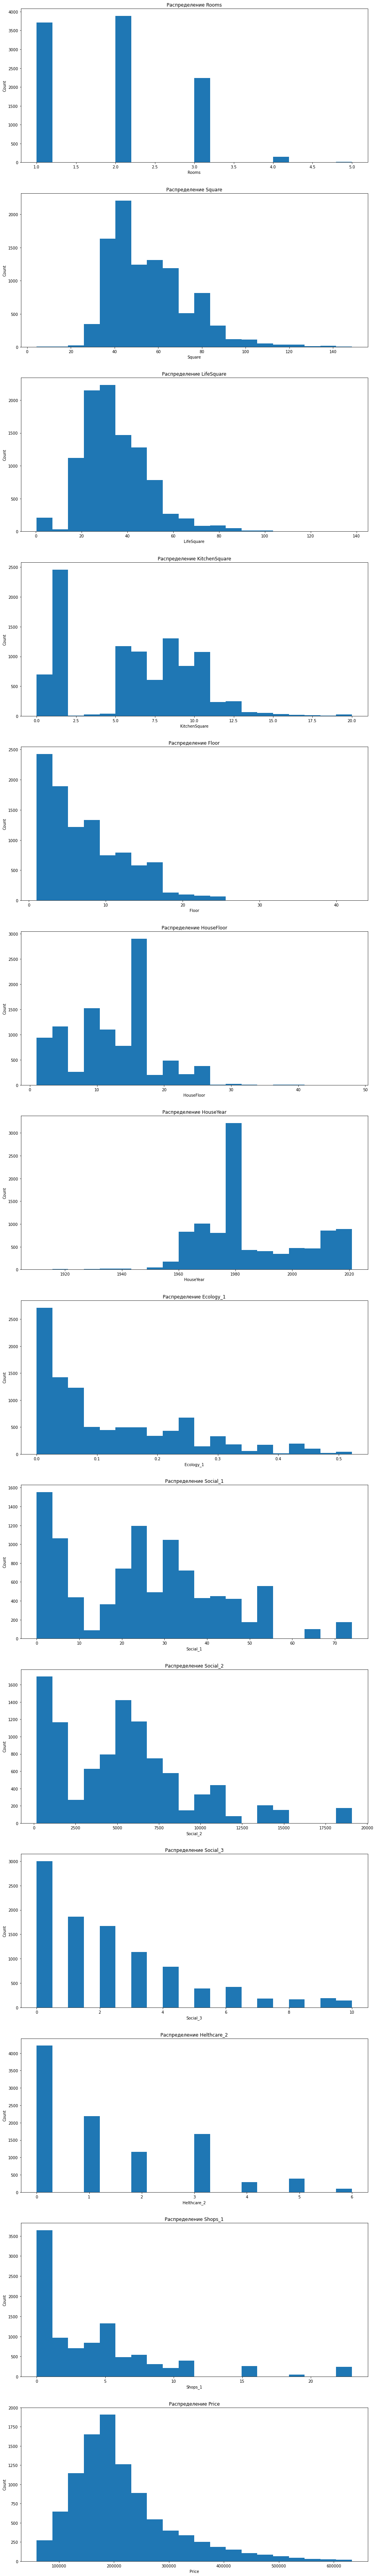

In [18]:
print(df_train.isna().sum())

df_num_features = df_train.select_dtypes(include=['float64', 'int64'])
fig, axs = plt.subplots(len(df_num_features.columns), 1, figsize=(16,121))

j=0
for i in df_num_features:
    axs[j].hist(df_train[i], bins=20)
    axs[j].set_title('Распределение ' + i)
    axs[j].set_xlabel(i)
    axs[j].set_ylabel('Count')
    j+=1
    print()

## Исследование номинативных признаков

In [19]:
df_obj_features = df_train.select_dtypes(include=['object'])

for i in df_obj_features:
    print('Количество уникальных значений признака ' + i + '\n')
    print(df_train[i].value_counts())
    print()

Количество уникальных значений признака Id

8952     1
4400     1
11807    1
8195     1
15267    1
        ..
14739    1
11762    1
158      1
4193     1
15006    1
Name: Id, Length: 10000, dtype: int64

Количество уникальных значений признака DistrictId

27     851
1      652
23     565
6      511
9      294
      ... 
196      1
174      1
199      1
207      1
117      1
Name: DistrictId, Length: 205, dtype: int64

Количество уникальных значений признака Ecology_2

B    9903
A      97
Name: Ecology_2, dtype: int64

Количество уникальных значений признака Ecology_3

B    9725
A     275
Name: Ecology_3, dtype: int64

Количество уникальных значений признака Shops_2

B    9175
A     825
Name: Shops_2, dtype: int64



## Выводы по номинативным признакам

#### DistrictId
Явных аномальий нет. Вся территория делится на 205 районов, вероятно не административных, а общепринятых.
Минимальное значение 0 может говоить о том, что индексация начинается с 0. Всего таких значений 48. В целом район можно назвать категориальным признаком, переведенный в числовое значение.

#### Ecology_2
Больше всего зданий относится к классу B

#### Ecology_3
Больше всего зданий относится к классу B

#### Shops_2
Типы магазинов поблизости. Больше всего магазинов типа B. Вероятно деление на обычные магазины и торговые центры.

## Целевая переменная

Построим график распределения целевой переменной "Price" - стоимости квартир

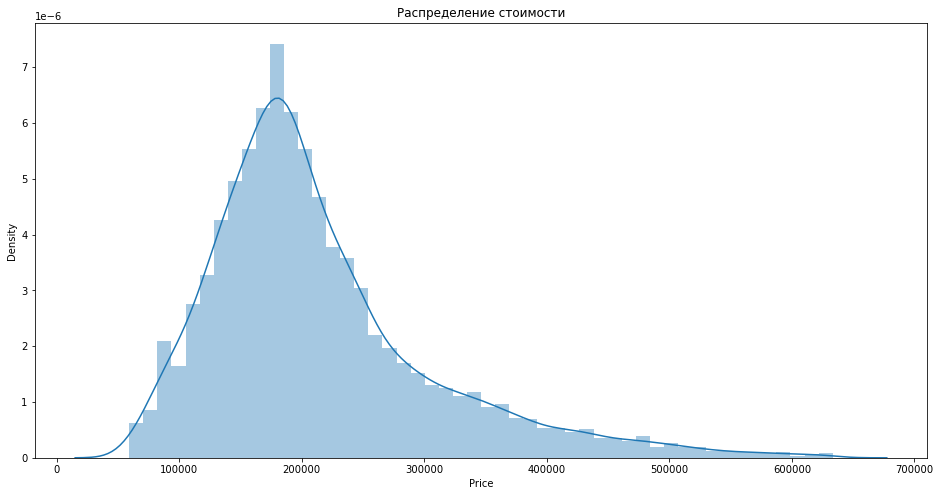

In [20]:
plt.figure(figsize = (16, 8))

sns.distplot(df_train['Price'])

plt.title('Распределение стоимости')
plt.show()

## Вывод по целевой переменной
Плотность распределения целевой переменной вполне нормальная. Большинство квартир встречаются в среднем ценовом диапазоне, по мере увеличения стоимости жилья распределение падает. 

### Зависимость целевой переменной от признаков
Поищем зависимости стоимости от наиболее, по моему мнению, показательных признаков. От которых цена должна меняться:
- DistrictId;
- Rooms;
- Square;
- Floor;
- Social_1;
- Social_2;
- Social_3;
- Helthcare_2
- Shops_1

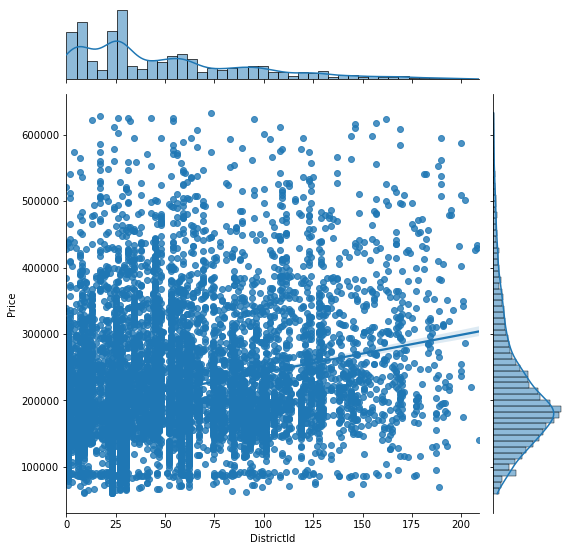

In [21]:
df_train['DistrictId'] = df_train['DistrictId'].astype(int)
grid = sns.jointplot(df_train['DistrictId'], df_train['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

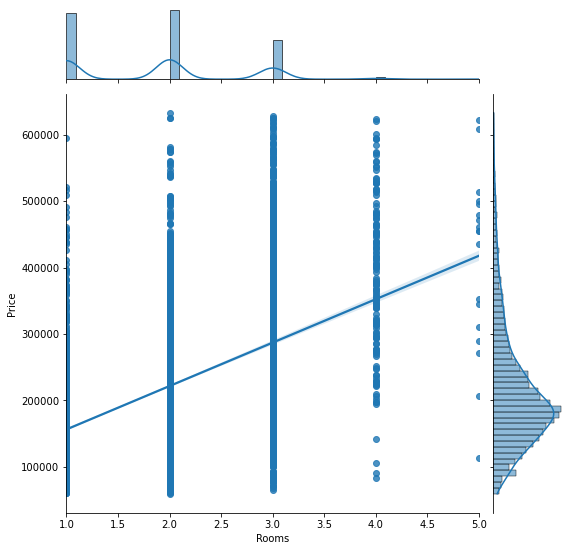

In [22]:
grid = sns.jointplot(df_train['Rooms'], df_train['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

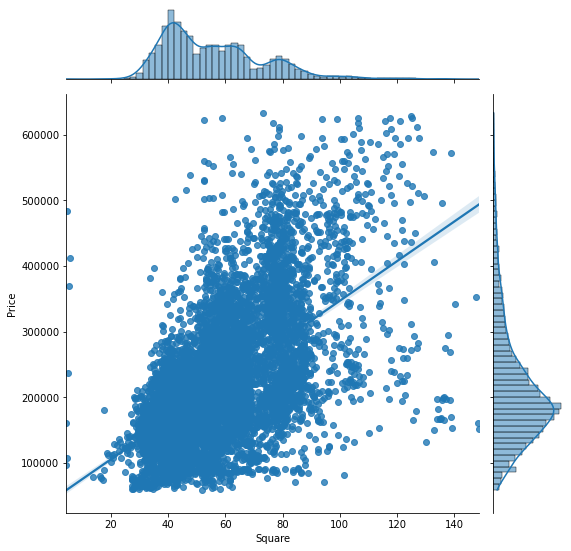

In [23]:
grid = sns.jointplot(df_train['Square'], df_train['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

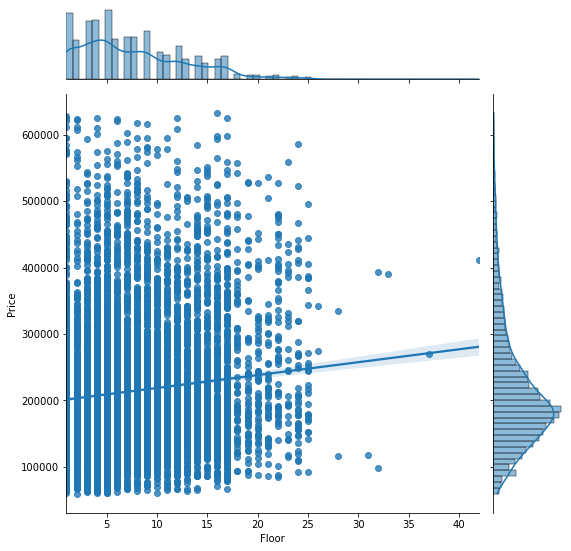

In [24]:
grid = sns.jointplot(df_train['Floor'], df_train['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

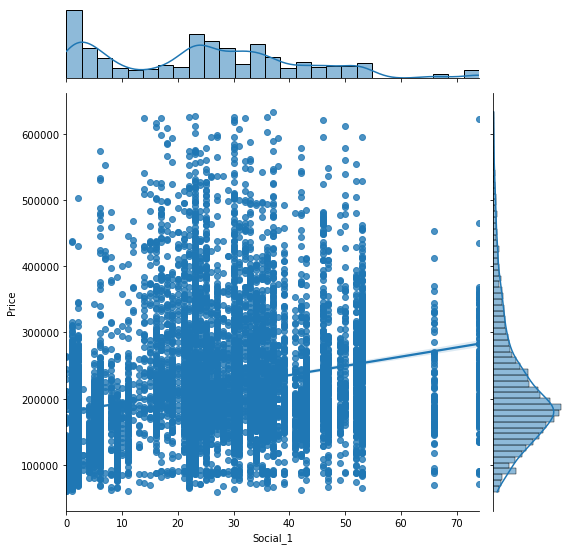

In [25]:
grid = sns.jointplot(df_train['Social_1'], df_train['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

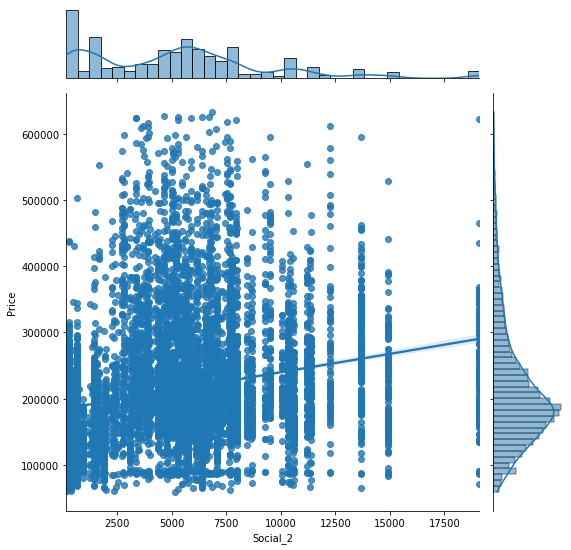

In [26]:
grid = sns.jointplot(df_train['Social_2'], df_train['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

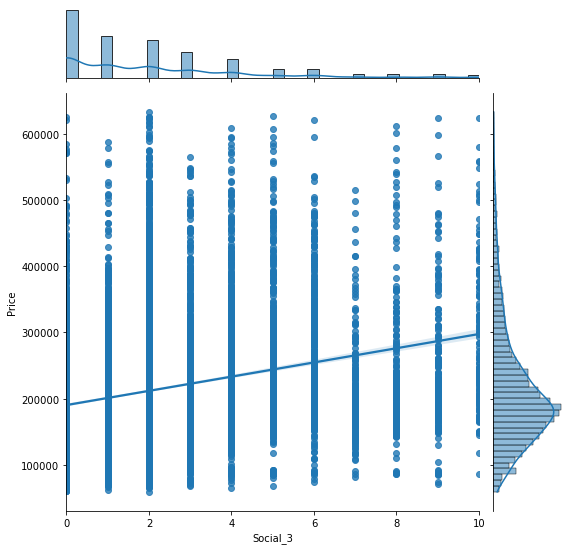

In [27]:
grid = sns.jointplot(df_train['Social_3'], df_train['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

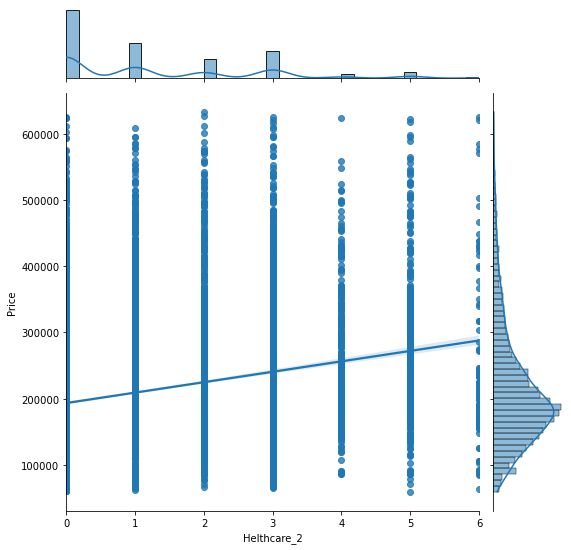

In [28]:
grid = sns.jointplot(df_train['Helthcare_2'], df_train['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

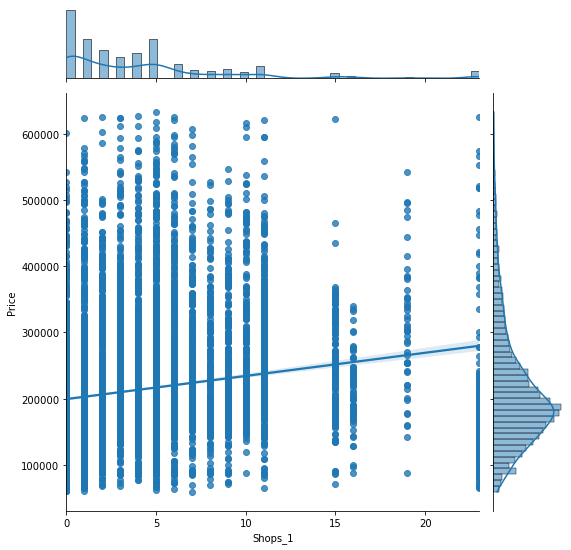

In [29]:
grid = sns.jointplot(df_train['Shops_1'], df_train['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

## Вывод по зависимостям
Явная зависимость цены проявляется от признаков:

- Square;
- Rooms.

Небольшая зависимость есть от признака DistrictId.

У остальных признаков, линейная зависимость невыраженная.

### Матрица корреляций

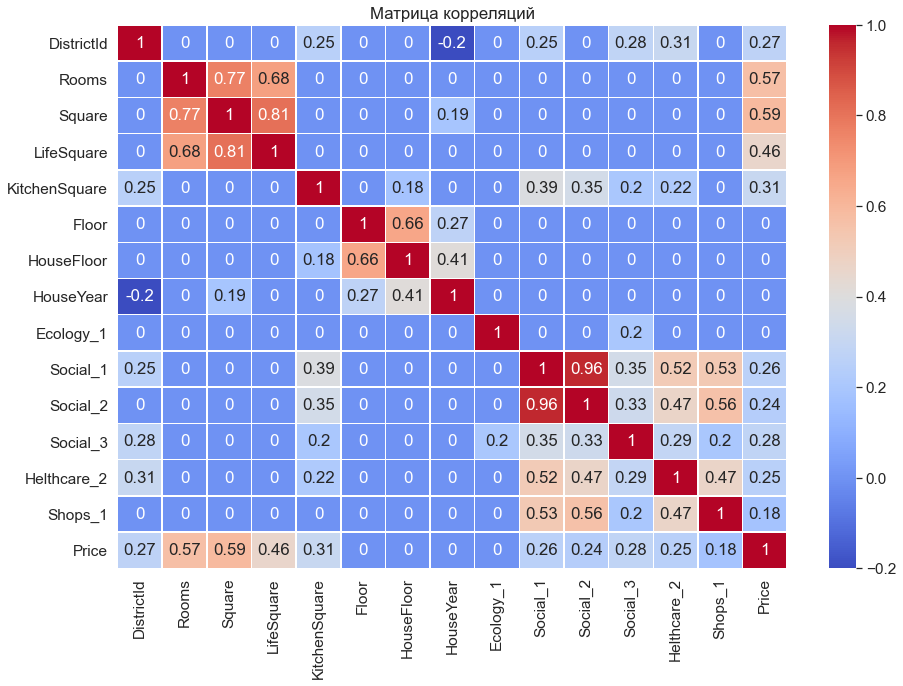

In [30]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.18] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корреляций')
plt.show()

### Вывод по корреляционной матрице
1. На матрице подтвердились ранее исследованные положительные корреляции стоимости от количества комнат и площади помещения. Так же выявилась слабая зависимость от района, социальных показателей 1 и 2, параметра медицины 2.
2. Есть явная положительная корреляция этажа от этажности дома.
3. Хорошо видна положительная корреляция всех социальных показателей и показателя здоровья 2 от наличия магазинов а так же от площади кухни.
4. Есть слабая корреляция показателей здоровья и социального показателя 1 от района.

## Класс подготовки данных

In [31]:
class dataPrepare:

    def __init__(self):
        self.medians = None  # сохраним все медианы
        self.k_median_ks = None  # переменная для коэфициента медиан 
        
    def fit(self, X):
        self.medians = X.median()  # Расчет медиан
    
    def transform(self, X):
        # Обработаем выбросы и нулевые значения Rooms
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']

        # Уберем объекты площадью меньше 4 и больше 150. Урежем хвосты и околонулевые значения
        X.loc[X['Square'] > 150, 'Square'] = self.medians['Square']
        X.loc[X['Square'] < 4, 'Square'] = self.medians['Square']

        # Почистим значения KitchenSquare которые больше Square
        # Определим коэффициент отношения площади кухни к общей площади
        k_median_ks =  self.medians['KitchenSquare'] / self.medians['Square']

        # исправим площадь кухни
        X.loc[(X['KitchenSquare'] > X['Square']), 'KitchenSquare'] = k_median_ks * X['Square']

        # Уберем хвост из площадей больше 20
        X.loc[X['KitchenSquare'] > 20, 'KitchenSquare'] = self.medians['KitchenSquare']

        # Исправим пропуски LifeSquare как произведение общей площади на коэффциент жилой площади от общей
        k_median_ls = self.medians['LifeSquare'] / self.medians['Square']
        X.loc[(X['LifeSquare'] > X['Square']) | 
             (X['LifeSquare'].isna()), 'LifeSquare'] = k_median_ls * X['Square']
        
        # изменим год постройки на текузий год, если он больше, чем текущая дата
        now = datetime.datetime.now()
        X.loc[(X['HouseYear'] > now.year), 'HouseYear'] = now.year

        # обработаем нулевые этажи
        X.loc[(X['Floor'] == 0), 'Floor'] = 1
        X.loc[(X['HouseFloor'] == 0), 'HouseFloor'] = 1

        # обработаем ситуацию когда этаж больше этажности
        X.loc[(X['Floor'] > X['HouseFloor']), 'Floor'] = X['HouseFloor']
        X.loc[X['HouseFloor'] > 50, 'HouseFloor'] = self.medians['HouseFloor']

        # Из ранее определенных параметров выровняем количество человек в квартире
        X.loc[(X['Social_3'] > 10), 'Social_3'] = self.medians['Social_3']

        # Удалим признак Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
        
        return X

## Обработка номинативных признаков

In [32]:
# Заменим буквенные значения на числовые
litera = {'A': 0, 'B': 1}

df_train['Ecology_2'] = df_train['Ecology_2'].replace(litera)
df_train['Ecology_3'] = df_train['Ecology_3'].replace(litera)
df_train['Shops_2'] = df_train['Shops_2'].replace(litera)
df_train.head()



,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,71.805603,10.0,4.0,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850
3,2352,1,1.0,40.409907,25.225816,1.0,10.0,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962


## Класс преобразования признаков

In [33]:
class dataDummies():
    
    def __init__(self):
        self.binary_to_numbers = None
        
    def fit(self):
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
    def transform(self, X):
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        return X

## Обучение на подготовленных cкриптах

In [34]:
# Импортируем данные
df_train = pd.read_csv(TRAIN_PATH)

# Создадим объекты классов и проинициализируем переменные
d_prepare = dataPrepare()
d_dummies = dataDummies()
d_prepare.fit(df_train)
d_dummies.fit()

# Подготовим данные
df_train = d_prepare.transform(df_train)
df_train = d_dummies.transform(df_train)

# Отделим целевую переменную
X = df_train.drop('Price', axis=1)
y = df_train['Price']

# Создадим тренировочные и валидацонные наборы
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

# Посмотрим на размерности и пропуски в данных. После обработки их не должно быть
print(X_train.shape, X_valid.shape)
print(X_train.isna().sum().sum(), 
      X_valid.isna().sum().sum())

(6700, 18) (3300, 18)
0 0


## Линейная регрессия

Коэффициент детерминации R2 для тренириовочных данных:	0.550136647079771
Коэффициент детерминации R2 для валидационных данных:	0.5741013765871497


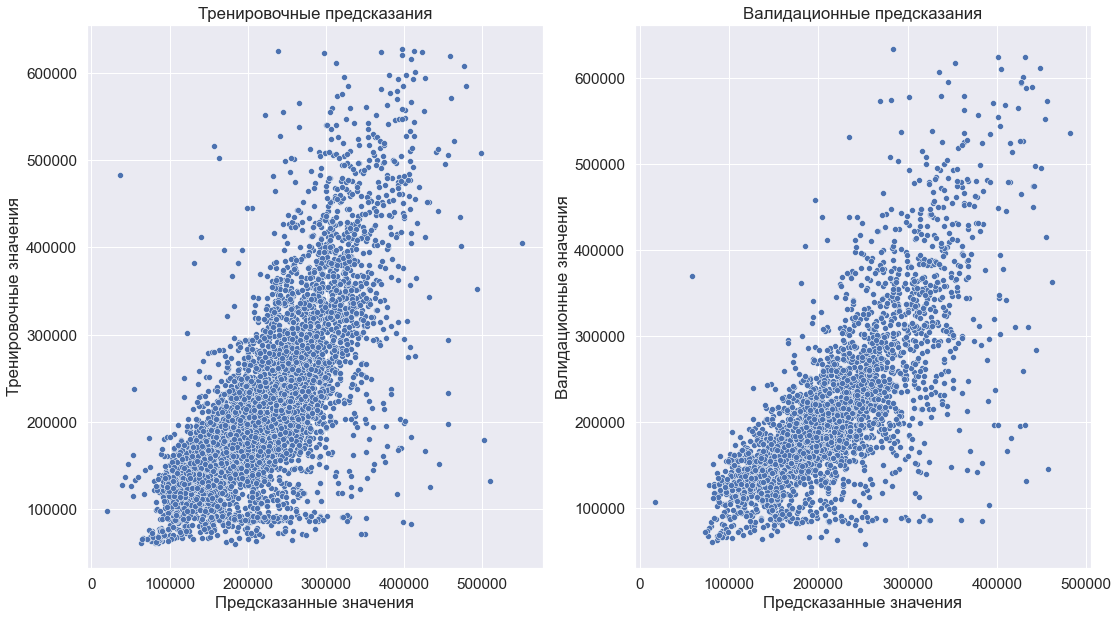

In [35]:
# Построим модель линейной регрессии и обучим ее
lr = LinearRegression()
lr.fit(X_train, y_train)

# Предскажем целевую переменную
y_train_pred_lr = lr.predict(X_train)
y_valid_pred_lr = lr.predict(X_valid)

# Посчитаем коэффициент детерминации R2
print("Коэффициент детерминации R2 для тренириовочных данных:\t" + str(r2_score(y_train, y_train_pred_lr)))
print("Коэффициент детерминации R2 для валидационных данных:\t" + str(r2_score(y_valid, y_valid_pred_lr)))

plt.figure(figsize=(18,10))
    
plt.subplot(121)
sns.scatterplot(y_train_pred_lr, y_train)
plt.xlabel('Предсказанные значения')
plt.ylabel('Тренировочные значения')
plt.title('Тренировочные предсказания')
    
plt.subplot(122)
sns.scatterplot(y_valid_pred_lr, y_valid)
plt.xlabel('Предсказанные значения')
plt.ylabel('Валидационные значения')
plt.title('Валидационные предсказания')
plt.show()

### Вывод
На валидационных данных модель показала себя лучше, чем на треировочных, но Двсе равно достаточно плохая вероятность при использовании модели линейной регрессии.

## Случайный лес

На основве сетки удалось улучшить модель с 0.724 до 0.730. При ручной доработке удалось поднять до 0.732. При этом для тренировочных данных R2 упала с 0.94 до 0.88

In [36]:
# parameters = [{'n_estimators': [200, 250, 300], 
#                'max_features': np.arange(3, 8),
#                'max_depth': np.arange(9, 13)}]

# from sklearn.model_selection import GridSearchCV

# gcv = GridSearchCV(estimator = RandomForestRegressor(random_state=21),
#                    param_grid = parameters,
#                    scoring = 'r2',
#                    cv = 3,
#                    n_jobs=-1,
#                   )

# gcv.fit(X_train, y_train)
# gcv.best_params_

Коэффициент детерминации R2 для тренириовочных данных:	0.8859034222529804
Коэффициент детерминации R2 для валидационных данных:	0.7320884273274169


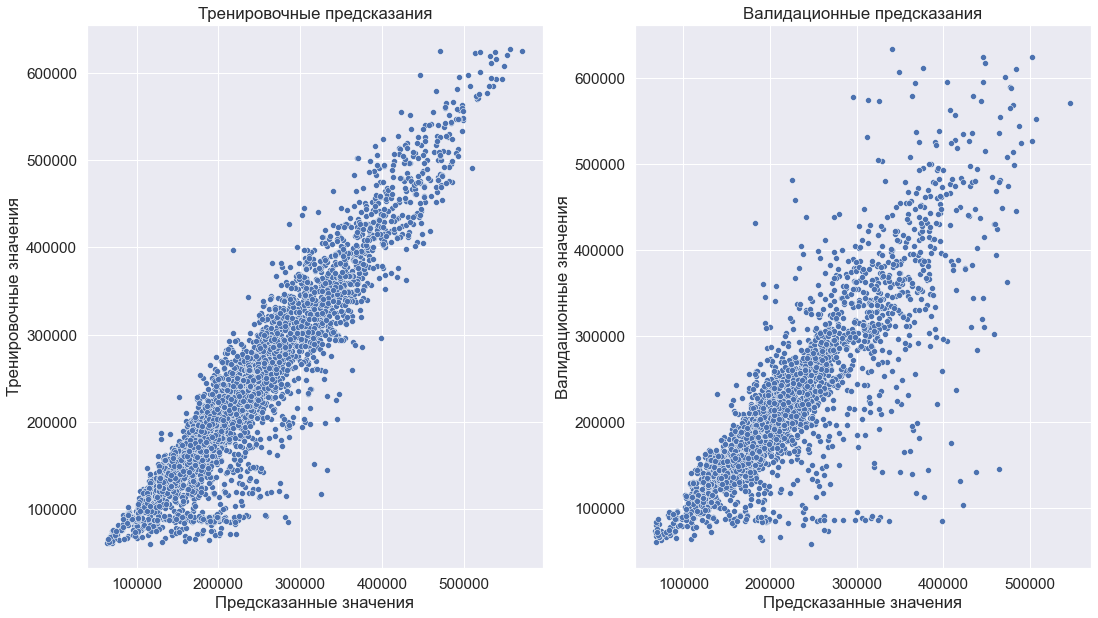

In [37]:
rfr = RandomForestRegressor(n_estimators=250, max_features=7, max_depth=12, random_state=100, criterion='mse')
rfr.fit(X_train, y_train)
y_train_pred_rf = rfr.predict(X_train)
y_valid_pred_rf = rfr.predict(X_valid)

# Посчитаем коэффициент детерминации R2
print("Коэффициент детерминации R2 для тренириовочных данных:\t" + str(r2_score(y_train, y_train_pred_rf)))
print("Коэффициент детерминации R2 для валидационных данных:\t" + str(r2_score(y_valid, y_valid_pred_rf)))
    
plt.figure(figsize=(18,10))
    
plt.subplot(121)
sns.scatterplot(y_train_pred_rf, y_train)
plt.xlabel('Предсказанные значения')
plt.ylabel('Тренировочные значения')
plt.title('Тренировочные предсказания')
    
plt.subplot(122)
sns.scatterplot(y_valid_pred_rf, y_valid)
plt.xlabel('Предсказанные значения')
plt.ylabel('Валидационные значения')
plt.title('Валидационные предсказания')
plt.show()

               importance
feature                  
Square           0.279015
Rooms            0.133032
LifeSquare       0.099338
Social_2         0.097366
Social_1         0.082265
DistrictId       0.056453
Ecology_1        0.038593
KitchenSquare    0.037362
Social_3         0.037176
HouseYear        0.034840
Shops_1          0.026689
HouseFloor       0.023758
Helthcare_2      0.018078
Id               0.017487
Floor            0.016379
Shops_2          0.001079
Ecology_3        0.000891
Ecology_2        0.000198


<AxesSubplot:xlabel='feature'>

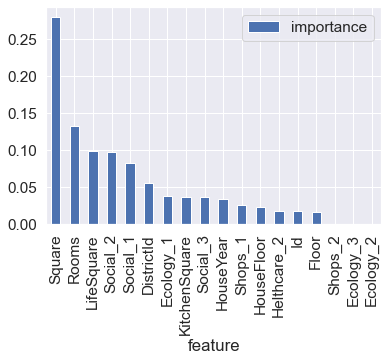

In [38]:
imp = pd.DataFrame({'feature': X_train.columns,'importance': rfr.feature_importances_})
imp = imp.sort_values('importance', ascending=False).set_index('feature')

print(imp)

imp.plot.bar()

### Вывод
Модель RandomForestRegressor на тренировочных данных показала себя хорошо, но на валидационных значительно хуже. Однако это гораздо лучше, чем линейная регрессия.

Наиболее важными признаками оказались:
- Square           0.279015
- Rooms            0.133032
- LifeSquare       0.099338
- Social_2         0.097366